# <center>3.1 Linear Regression
## <center>Hose prices dataset

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/house-prices-train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Echamos un vistazo a la variable a predecir

In [32]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


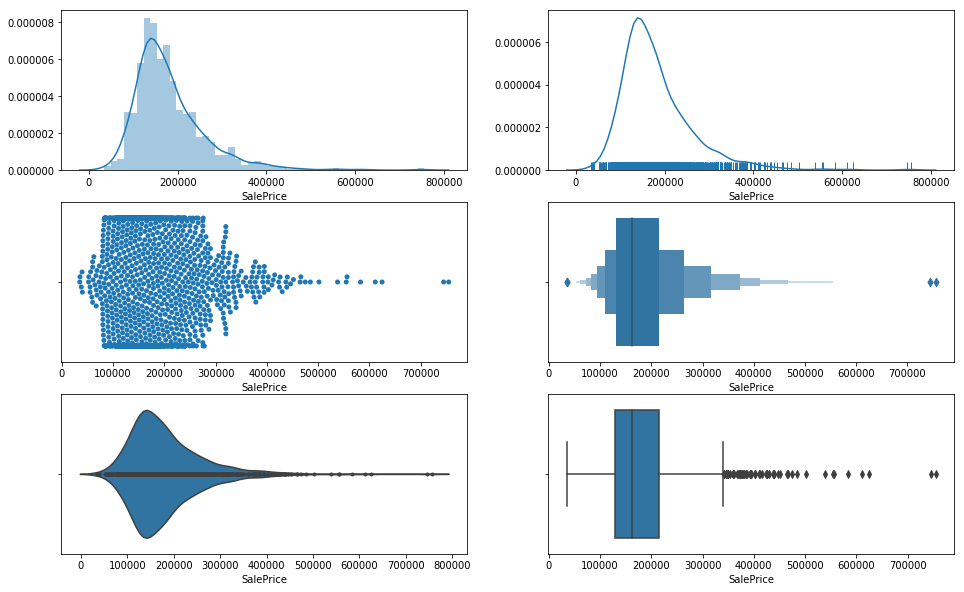

In [25]:
f, a = plt.subplots(nrows=3, ncols=2, figsize=(16,10))

sns.distplot(df.SalePrice,  ax=a[0, 0])
sns.distplot(df.SalePrice, hist=False, rug=True, ax=a[0, 1])
sns.swarmplot(df.SalePrice, ax=a[1, 0])
sns.boxenplot(df.SalePrice, ax=a[1, 1])
sns.violinplot(df.SalePrice, inner="points", ax=a[2, 0])
sns.boxplot(df.SalePrice,   ax=a[2, 1]);

## Mi preferido: violinplot + stripplot

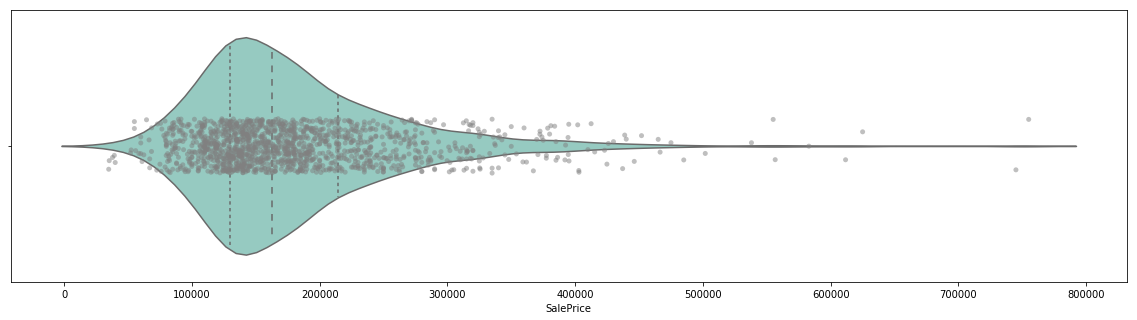

In [45]:
def ditribution(variable, size):
    plt.figure(figsize=size)
    sns.violinplot(variable, palette="Set3", inner="quart" )
    sns.stripplot(variable, color="grey", alpha=.5);

ditribution(df.SalePrice, size=(20,5))

# Transformación logaritmica

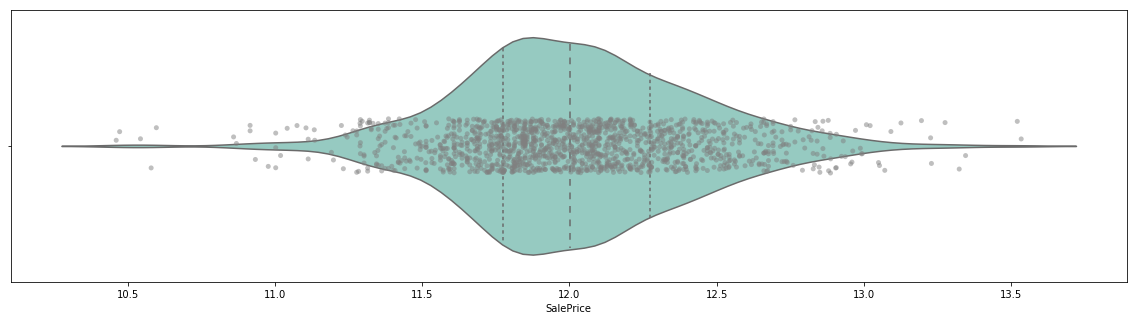

In [49]:
ditribution(np.log1p(df.SalePrice), size=(20,5))

## Vamos a quitarnos el 1% de las casas más caras

In [29]:
limite_comun_exclusivo = df.SalePrice.quantile(0.99)
limite_comun_exclusivo

442567.0100000005

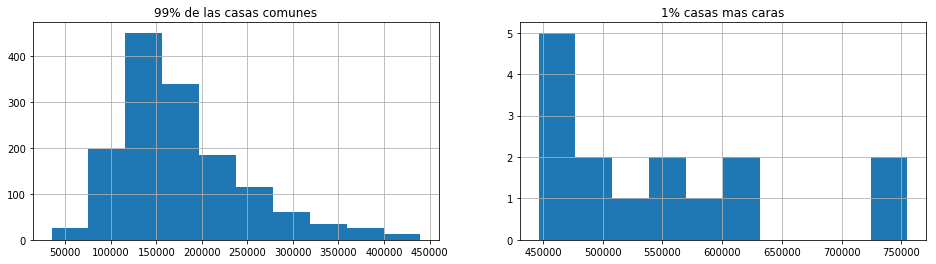

In [30]:
f, a = plt.subplots(nrows=1, ncols=2, figsize=(16,4))

df[df.SalePrice < limite_comun_exclusivo].SalePrice.hist(ax=a[0]);
df[df.SalePrice > limite_comun_exclusivo].SalePrice.hist(ax=a[1]);

a[0].title.set_text('99% de las casas comunes')
a[1].title.set_text('1% casas mas caras')

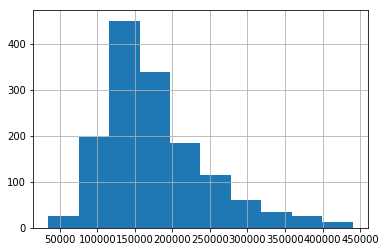

In [13]:
df[df.SalePrice < limite_comun_exclusivo].SalePrice.hist();

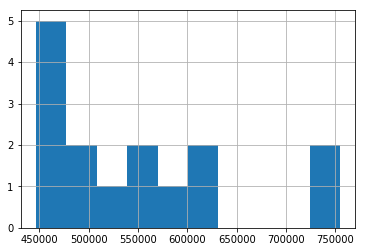

In [14]:
df[df.SalePrice > limite_comun_exclusivo].SalePrice.hist();